In [263]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [264]:
data = pd.read_csv(r"C:\Users\User\Desktop\MiD\Aufbereitete Daten\Trips_processed_we.csv")

In [265]:
data.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck
0,1002822,1,1,5:50:00,5:55:00,23,23,350,355,5,0,1,515.0,0.19,2.28,0,1,7704,7704,7704,0,77,22,77,55,4,2,1
1,1002822,2,1,14:30:00,14:55:00,58,59,870,895,25,1,2,35.0,23.28,55.87,0,1,7704,601,7704,0,77,22,77,55,4,2,5
2,1002822,3,1,15:30:00,15:55:00,62,63,930,955,25,2,0,835.0,23.28,55.87,0,1,7704,7704,7704,0,77,22,77,55,4,2,8
3,1007211,1,1,10:00:00,10:19:00,40,41,600,619,19,0,2,10.0,3.80,12.00,0,7,7704,602,7704,0,77,22,77,55,2,2,5
4,1007211,2,1,10:29:00,10:35:00,41,42,629,635,6,2,2,20.0,1.90,19.00,0,7,501,7704,7704,0,77,22,77,55,2,2,4


In [266]:
# Einordnen der Ankunftszeiten in kategorische Tageszeiten

# Tageszeit:
# 0: Morgen: 5 bis 10 Uhr
# 1: Vormittag: 10 bis 12 Uhr
# 2: Mittag: 12 bis 14 Uhr
# 3: Nachmittag: 14 bis 18 Uhr
# 4: Abend: 18 bis 23 Uhr
# 5: Nacht: 23 bis 5 Uhr
data["Arrival_TZ"] = pd.Series()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


In [267]:
for i in range(len(data)):
    t = int(data.at[i, "Arrival"] / 60)
    # Morgen
    if 5 <= t < 10:
        data.at[i, "Arrival_TZ"] = 0
    # Vormittag
    elif 10 <= t < 12:
        data.at[i, "Arrival_TZ"] = 1
    # Mittag
    elif 12 <= t < 14: 
        data.at[i, "Arrival_TZ"] = 2
    # Nachmittag
    elif 14 <= t < 18: 
        data.at[i, "Arrival_TZ"] = 3
    # Abend
    elif 18 <= t < 23: 
        data.at[i, "Arrival_TZ"] = 4
    # Nacht
    elif 23 <= t < 24 or 0 <= t < 5: 
        data.at[i, "Arrival_TZ"] = 5        

data["Arrival_TZ"] = data["Arrival_TZ"].astype(int)  

In [268]:
data["W_ZWDE"].value_counts()

7704    129063
2202     52598
501      12796
502       3367
503       1023
505        396
504        205
7705       130
999         73
Name: W_ZWDE, dtype: int64

In [269]:
einkaufen = data[data["Whyto"] == 2]
einkaufen["W_ZWDE"].value_counts()

7704    16211
2202    13153
501     12796
502      3367
503      1023
505       396
504       205
999        73
Name: W_ZWDE, dtype: int64

In [270]:
einkaufen["W_ZWDP"].value_counts()

7704    18293
2202    13153
601      4812
604      2616
701      1865
504      1475
602      1275
603      1115
713       490
605       465
503       442
706       418
714       308
717       173
999       109
716        79
711        60
705        53
715        23
Name: W_ZWDP, dtype: int64

In [271]:
einkaufen["Arrival_TZ"].value_counts()

3    15935
1    11488
0     9406
2     6503
4     3855
5       37
Name: Arrival_TZ, dtype: int64

In [272]:
len(einkaufen)

47224

In [273]:
# Aussortieren der Papi Werte in welchen Detail nicht erhoben
filt = ~ (einkaufen["W_ZWDE"] == 2202)
einkaufen = einkaufen[filt]

In [274]:
einkaufen["W_ZWDE"].value_counts()

7704    16211
501     12796
502      3367
503      1023
505       396
504       205
999        73
Name: W_ZWDE, dtype: int64

In [275]:
einkaufen.reset_index(drop=True, inplace=True)

In [276]:
"""
Zustand Einkaufen setzt sich aus Einkauf und Private Erledigung zusammen.
Wege die kein Einkaufsweg sind (7704) sind private Erledigungen.
Übernehme für die Einträge die Aufschlüsselung aus den Details zur privaten Erledigung (W_ZWDP)
"""
for i in range(len(einkaufen)):
    if einkaufen.at[i, "W_ZWDE"] == 7704:
        einkaufen.at[i, "W_ZWDE"] = einkaufen.at[i, "W_ZWDP"]

In [277]:
einkaufen["W_ZWDE"].value_counts()

501     12796
601      4812
502      3367
604      2616
701      1865
504      1680
503      1465
602      1275
603      1115
713       490
605       465
7704      433
706       418
505       396
714       308
999       182
717       173
716        79
711        60
705        53
715        23
Name: W_ZWDE, dtype: int64

In [278]:
# entferne restliche 7704 Einträge -> unplausible Werte
filt = ~ (einkaufen["W_ZWDE"] == 7704)
einkaufen = einkaufen[filt]

In [279]:
einkaufen["W_ZWDE"].value_counts()

501    12796
601     4812
502     3367
604     2616
701     1865
504     1680
503     1465
602     1275
603     1115
713      490
605      465
706      418
505      396
714      308
999      182
717      173
716       79
711       60
705       53
715       23
Name: W_ZWDE, dtype: int64

In [280]:
len(einkaufen)

33638

In [281]:
einkaufen["W_ZWDE"].value_counts(normalize=True)

501    0.380403
601    0.143053
502    0.100095
604    0.077769
701    0.055443
504    0.049944
503    0.043552
602    0.037904
603    0.033147
713    0.014567
605    0.013824
706    0.012426
505    0.011772
714    0.009156
999    0.005411
717    0.005143
716    0.002349
711    0.001784
705    0.001576
715    0.000684
Name: W_ZWDE, dtype: float64

In [282]:
"""
501 = täglicher Bedarf = 38% -> Supermarkt
601 = Arztbesuch, andere medizinische Dienstleistung 14% -> Arzt, Physio, Apotheke
502 = sonstige Waren = 10% -> andere Geschäfte
604 = sonstiges = 7.8% -> Sonstiges
701 = Besuch/Treffen von Freunden, Verwandten, Bekannten = 5.5% -> Wohnort
504 = Dienstleistung (Friseur, Schuster etc.) = 5% -> Dienstleistung
503 = allgemeiner Einkaufsbummel ) = 4.4% -> andere Geschäfte
602 = Behörde, Bank, Post, Geldautomat = 3.8% -> Dienstleistung oder eigene Kategorie
603 = private Erledigung für andere Personen = 3.3% -> Sonstiges
713 = Kirche, Friedhof = 1.5% -> Kirche, Friedhof
605 = Betreuung Familienmitglieder, Bekannter = 1.4% -> Wohnort
706 = Restaurant, Gaststätte, Mittagessen etc. = 1.2% -> Restaurant, Gaststätte
505 = sonstiges = 1.2% -> Sonstiges

"""

'\n501 = täglicher Bedarf = 38% -> Supermarkt\n601 = Arztbesuch, andere medizinische Dienstleistung 14% -> Arzt, Physio, Apotheke\n502 = sonstige Waren = 10% -> andere Geschäfte\n604 = sonstiges = 7.8% -> Sonstiges\n701 = Besuch/Treffen von Freunden, Verwandten, Bekannten = 5.5% -> Wohnort\n504 = Dienstleistung (Friseur, Schuster etc.) = 5% -> Dienstleistung\n503 = allgemeiner Einkaufsbummel ) = 4.4% -> andere Geschäfte\n602 = Behörde, Bank, Post, Geldautomat = 3.8% -> Dienstleistung oder eigene Kategorie\n603 = private Erledigung für andere Personen = 3.3% -> Sonstiges\n713 = Kirche, Friedhof = 1.5% -> Kirche, Friedhof\n605 = Betreuung Familienmitglieder, Bekannter = 1.4% -> Wohnort\n706 = Restaurant, Gaststätte, Mittagessen etc. = 1.2% -> Restaurant, Gaststätte\n505 = sonstiges = 1.2% -> Sonstiges\n\nZustände unter 1% -> vernachlässigen\n'

In [283]:
freizeit = data[data["Whyto"] == 3]
filt = ~ ((freizeit["W_ZWDF"] == 7704) | (freizeit["W_ZWDF"] == 2202)) 
freizeit = freizeit[filt]
freizeit["W_ZWDF"].value_counts()

704    3800
701    3642
706    1374
717    1048
720     612
714     571
702     512
703     461
710     347
708     306
713     289
707     238
711     223
709     170
705     150
716     113
503     111
999      94
712      72
603      51
719      47
605      20
Name: W_ZWDF, dtype: int64

In [284]:
freizeit["W_ZWDF"].value_counts(normalize=True)

704    0.266648
701    0.255561
706    0.096414
717    0.073539
720    0.042944
714    0.040067
702    0.035927
703    0.032349
710    0.024349
708    0.021472
713    0.020279
707    0.016701
711    0.015648
709    0.011929
705    0.010526
716    0.007929
503    0.007789
999    0.006596
712    0.005052
603    0.003579
719    0.003298
605    0.001403
Name: W_ZWDF, dtype: float64

In [285]:
"""
704 = Sport  = 26.7 %
701 = Besuch/Treffen Freunde/Verwandte/Bekannte = 25.6%
706 = Restaurant/Gaststätte/Kneipe/Disco = 9.6%
717 = Hobby(z.B. Musizieren) = 7.4%
720 = sonstiges = 4.3%
714 = Ehrenamt, Verein, politische Aktivität = 4.0%
702 = Besuch kultureller Einrichtung (Kino, Theater, Museum)
703 = Besuch einer Veranstaltung (z.B. Fußballspiel, Markt, Popkonzert)
710 = 
"""

'\n704 = Sport  = 26.7 %\n701 = Besuch/Treffen Freunde/Verwandte/Bekannte = 25.6%\n706 = Restaurant/Gaststätte/Kneipe/Disco = 9.6%\n717 = Hobby(z.B. Musizieren) = 7.4%\n720 = sonstiges = 4.3%\n714 = Ehrenamt, Verein, politische Aktivität = 4.0%\n702 = Besuch kultureller Einrichtung (Kino, Theater, Museum)\n703 = Besuch einer Veranstaltung (z.B. Fußballspiel, Markt, Popkonzert)\n710 = \n'

In [286]:
repl_einkaufen= {605:"Wohnort", 
                701:"Wohnort",
                501:"Supermarkt",
                502:"Sonstiges Geschäft",
                503:"Sonstiges Geschäft",
                504:"Dienstleistung",
                601:"Medizinisch",
                602:"BBPG",
                706:"Gastronomie",
                713:"Kirche, Friedhof"}

einkaufen["W_ZWDE"] = einkaufen["W_ZWDE"].replace(repl_einkaufen)

In [287]:
for i in einkaufen.index:
    if not isinstance(einkaufen.at[i, "W_ZWDE"], str):
        einkaufen.at[i, "W_ZWDE"] = "Sonstiges"

In [288]:
einkaufen["W_ZWDE"].value_counts()

Supermarkt            12796
Sonstiges              5005
Sonstiges Geschäft     4832
Medizinisch            4812
Wohnort                2330
Dienstleistung         1680
BBPG                   1275
Kirche, Friedhof        490
Gastronomie             418
Name: W_ZWDE, dtype: int64

In [289]:
einkaufen_red = einkaufen[~ (einkaufen["W_ZWDE"] == "Sonstiges")]

In [290]:
einkaufen_red["W_ZWDE"].value_counts()

Supermarkt            12796
Sonstiges Geschäft     4832
Medizinisch            4812
Wohnort                2330
Dienstleistung         1680
BBPG                   1275
Kirche, Friedhof        490
Gastronomie             418
Name: W_ZWDE, dtype: int64

In [291]:
supermarkt = [0 for i in range(6)]
sonstiges_geschäft = [0 for i in range(6)]
medizinisch = [0 for i in range(6)]
wohnort = [0 for i in range(6)]
dienstleistung = [0 for i in range(6)]
bbpg = [0 for i in range(6)]
kirche_friedhof = [0 for i in range(6)]
gastronomie = [0 for i in range(6)]

In [292]:
einkaufen_grpd = einkaufen_red.groupby(["Arrival_TZ"])

In [293]:
einkaufen_grpd.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
0,1002822,2,1,14:30:00,14:55:00,58,59,870,895,25,1,2,35.0,23.28,55.87,0,1,Medizinisch,601,7704,0,77,22,77,55,4,2,5,3
1,1007211,1,1,10:00:00,10:19:00,40,41,600,619,19,0,2,10.0,3.80,12.00,0,7,BBPG,602,7704,0,77,22,77,55,2,2,5,1
2,1007211,2,1,10:29:00,10:35:00,41,42,629,635,6,2,2,20.0,1.90,19.00,0,7,Supermarkt,7704,7704,0,77,22,77,55,2,2,4,1
3,1007491,1,1,9:00:00,9:15:00,36,37,540,555,15,0,2,15.0,5.70,22.80,0,7,Supermarkt,7704,7704,0,72,12,72,52,2,2,4,0
4,1007492,1,1,9:00:00,9:15:00,36,37,540,555,15,0,2,15.0,5.70,22.80,0,7,Supermarkt,7704,7704,0,72,12,72,52,2,2,4,0
5,1007492,3,1,9:55:00,10:00:00,39,40,595,600,5,0,2,20.0,0.48,5.76,0,7,Supermarkt,7704,7704,0,72,12,72,52,2,2,4,1
6,1012911,1,1,8:50:00,9:00:00,35,36,530,540,10,0,2,60.0,4.75,28.50,0,7,Medizinisch,601,7704,0,75,22,74,53,4,2,5,0
7,1014771,2,1,18:20:00,18:35:00,73,74,1100,1115,15,1,2,20.0,9.50,38.00,0,2,BBPG,602,7704,0,76,21,76,54,2,2,5,4
8,1017021,2,1,15:00:00,15:20:00,60,61,900,920,20,1,2,70.0,13.30,39.90,0,1,Wohnort,701,7704,0,77,22,77,55,2,2,5,3
9,1017021,3,1,16:30:00,17:00:00,66,68,990,1020,30,2,2,75.0,7.60,15.20,0,1,Medizinisch,601,7704,0,77,22,77,55,2,2,5,3


In [294]:
for t, group in einkaufen_grpd:
    counts = group["W_ZWDE"].value_counts(normalize=True)
    if counts.get("Supermarkt"):
        supermarkt[t] = counts["Supermarkt"]
        
    if counts.get("Sonstiges Geschäft"):
        sonstiges_geschäft[t] = counts["Sonstiges Geschäft"]
        
    if counts.get("Medizinisch"):
        medizinisch[t] = counts["Medizinisch"]
        
    if counts.get("Wohnort"):
        wohnort[t] = counts["Wohnort"]
        
    if counts.get("Dienstleistung"):
        dienstleistung[t] = counts["Dienstleistung"]
        
    if counts.get("BBPG"):
        bbpg[t] = counts["BBPG"]
    
    if counts.get("Kirche, Friedhof"):
        kirche_friedhof[t] = counts["Kirche, Friedhof"]
        
    if counts.get("Gastronomie"):
        gastronomie[t] = counts["Gastronomie"]

In [295]:
supermarkt

[0.4231166150670795,
 0.46771177908816336,
 0.46362229102167185,
 0.43229380385720145,
 0.481581311769991,
 0.0625]

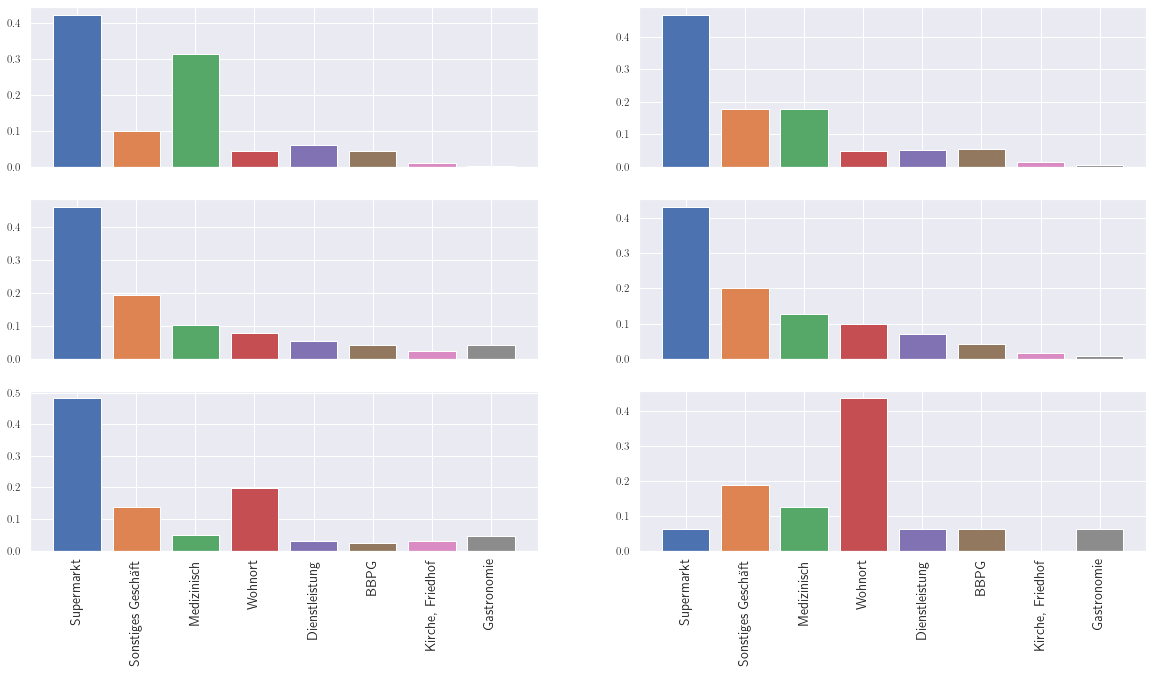

In [296]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

fig, (axs) = plt.subplots(3, 2, figsize=(20,10))
axs = [ax for sublist in axs for ax in sublist]
x_ticks = ["Supermarkt", "Sonstiges Geschäft", "Medizinisch", "Wohnort", "Dienstleistung", "BBPG", "Kirche, Friedhof", "Gastronomie"]
for i in range(6):
    axs[i].bar(0, supermarkt[i], label="Supermarkt")
    axs[i].bar(1, sonstiges_geschäft[i], label="Sonstiges Geschäft")
    axs[i].bar(2, medizinisch[i], label="Medizinisch")
    axs[i].bar(3, wohnort[i], label="Wohnort")
    axs[i].bar(4, dienstleistung[i], label="Dienstleistung")
    axs[i].bar(5, bbpg[i], label="BBPG")
    axs[i].bar(6, kirche_friedhof[i], label="Kirche, Friedhof")
    axs[i].bar(7, gastronomie[i], label="Gastronomie")
    if i > 3:
        plt.sca(axs[i])
        plt.xticks([i for i in range(8)], x_ticks, rotation=90, fontsize=14)
    else:
        plt.sca(axs[i])
        plt.xticks([i for i in range(8)], [])
    


In [297]:
colors = [(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)];

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'clmodern',
          'text.latex.unicode': True,
          }
sns.set(font_scale=1, style="whitegrid", rc=params) 
sns.set_palette(colors);

C:\Users\User\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


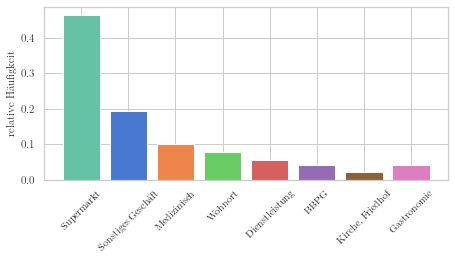

In [311]:
# Plot für Ausarbeitung 

fig = plt.figure(figsize=(6.2596, 3))
x_ticks = ["Supermarkt", "Sonstiges Geschäft", "Medizinisch", "Wohnort", "Dienstleistung", "BBPG", "Kirche, Friedhof", "Gastronomie"];

plt.bar(0, supermarkt[2], label="Supermarkt")
plt.bar(1, sonstiges_geschäft[2], label="Sonstiges Geschäft")
plt.bar(2, medizinisch[2], label="Medizinisch")
plt.bar(3, wohnort[2], label="Wohnort")
plt.bar(4, dienstleistung[2], label="Dienstleistung")
plt.bar(5, bbpg[2], label="BBPG")
plt.bar(6, kirche_friedhof[2], label="Kirche, Friedhof")
plt.bar(7, gastronomie[2], label="Gastronomie")
plt.tight_layout()

plt.xticks([i for i in range(8)], x_ticks, rotation=45, fontsize=10)
plt.ylabel("relative Häufigkeit", fontsize=11)

path = r"C:\Users\User\Desktop\Masterarbeit\Masterarbeit Latex\Abbildungen\Einkaufen-Haeufigkeit.pdf"
fig.savefig(path, dpi=1000, bbox_inches='tight')

In [236]:
supermarkt[2]

0.46362229102167185

In [237]:
einkaufen_dict = {"Supermarkt":supermarkt, "Sonstiges Geschäft":sonstiges_geschäft, "Medizinisch":medizinisch, "Wohnort":wohnort,
                  "Dienstleistung":dienstleistung, "BBPG":bbpg, "Kirche, Friedhof":kirche_friedhof, "Gastronomie":gastronomie}

In [238]:
# Freizeit
freizeit.head()

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
95,1047742,3,3,20:45:00,21:00:00,83,84,1245,1260,15,0,3,80.0,1.90,7.60,0,7,7704,7704,706,0,72,12,72,52,4,2,7,4
105,1054553,2,3,15:40:00,16:10:00,62,64,940,970,30,1,3,80.0,19.95,39.90,0,1,7704,7704,704,0,73,12,75,53,4,2,7,3
116,1063771,1,3,8:00:00,9:45:00,32,39,480,585,105,0,3,375.0,176.70,100.97,0,7,7704,7704,704,0,73,12,75,53,4,2,7,0
122,1066781,3,3,13:30:00,15:12:00,54,60,810,912,102,0,3,18.0,4.75,2.79,0,2,7704,7704,711,0,72,12,72,52,2,2,7,3
125,1066781,6,3,17:00:00,18:31:00,68,74,1020,1111,91,0,3,769.0,5.23,3.45,0,2,7704,7704,711,0,72,12,72,52,2,2,7,4


In [239]:
freizeit["W_ZWDF"].value_counts()

704    3800
701    3642
706    1374
717    1048
720     612
714     571
702     512
703     461
710     347
708     306
713     289
707     238
711     223
709     170
705     150
716     113
503     111
999      94
712      72
603      51
719      47
605      20
Name: W_ZWDF, dtype: int64

In [240]:
freizeit_repl = {
                605:"Wohnort",
                701:"Wohnort",
                503:"sonstiges Geschäft",
                706:"Gastronomie",
                713:"Kirche, Friedhof",
                #717:"Hobby",
                702:"Kulturelle Einrichtung",
                704:"Sportstätten",
                }

In [241]:
freizeit["W_ZWDF"] = freizeit["W_ZWDF"].replace(freizeit_repl)

In [242]:
# freizeit["W_ZWDF"].astype(int)

In [243]:
for i in freizeit.index:
    if not isinstance(freizeit.at[i, "W_ZWDF"], str):
        freizeit.at[i, "W_ZWDF"] = "Sonstiges"

In [244]:
freizeit["W_ZWDF"].value_counts()

Sonstiges                 4503
Sportstätten              3800
Wohnort                   3662
Gastronomie               1374
Kulturelle Einrichtung     512
Kirche, Friedhof           289
sonstiges Geschäft         111
Name: W_ZWDF, dtype: int64

In [245]:
len(freizeit)

14251

In [246]:
freizeit["Arrival_TZ"].value_counts(normalize=True)

4    0.334363
3    0.330503
1    0.117395
0    0.108063
2    0.106098
5    0.003579
Name: Arrival_TZ, dtype: float64

In [247]:
filt = ~ (freizeit["W_ZWDF"] == "Sonstiges")
freizeit = freizeit[filt]

In [248]:
freizeit_grpd = freizeit.groupby(["Arrival_TZ"])

In [249]:
sport = [0 for i in range(6)]
wohnort = [0 for i in range(6)]
gastro = [0 for i in range(6)]
#hobby = [0 for i in range(6)]
kulturell = [0 for i in range(6)]
kirche_friedhof = [0 for i in range(6)]
sonstiges_geschäft = [0 for i in range(6)]

In [250]:
for t, group in freizeit_grpd:
    counts = group["W_ZWDF"].value_counts(normalize=True)
    if counts.get("Sportstätten"):
        sport[t] = counts["Sportstätten"]
        
    if counts.get("Wohnort"):
        wohnort[t] = counts["Wohnort"]
        
    if counts.get("Gastronomie"):
        gastro[t] = counts["Gastronomie"]
        
    #if counts.get("Hobby"):
        #hobby[t] = counts["Hobby"]
        
    if counts.get("Kulturelle Einrichtung"):
        kulturell[t] = counts["Kulturelle Einrichtung"]
        
    if counts.get("Kirche, Friedhof"):
        kirche_friedhof[t] = counts["Kirche, Friedhof"]
    
    if counts.get("sonstiges Geschäft"):
        sonstiges_geschäft[t] = counts["sonstiges Geschäft"]

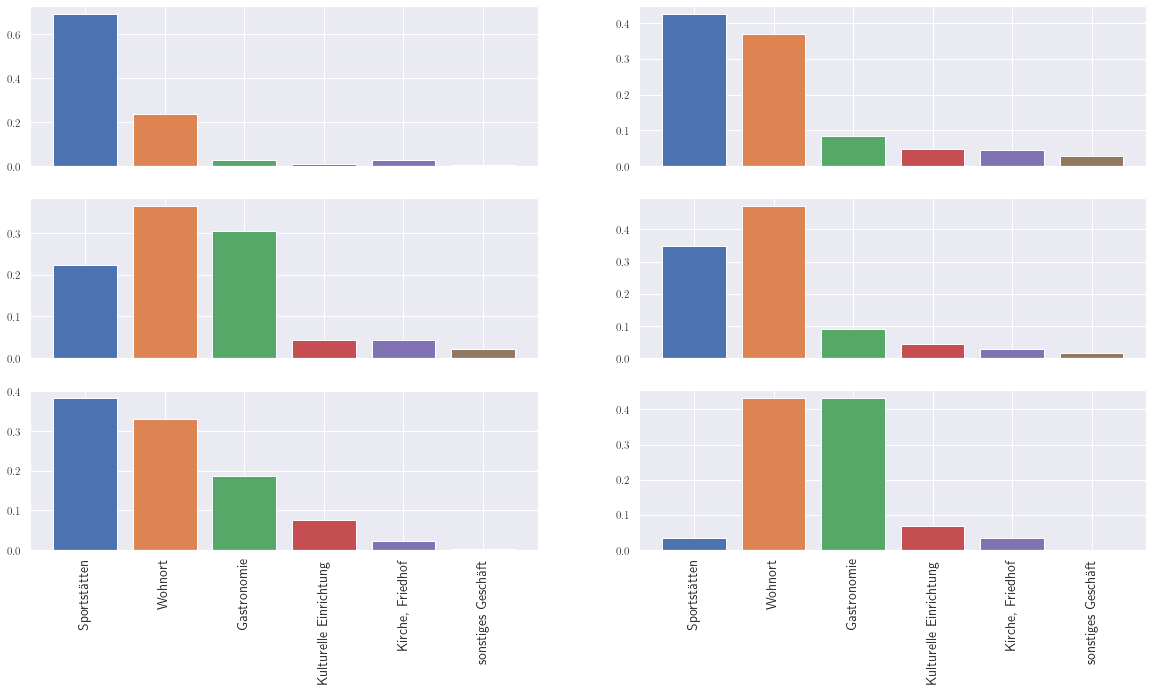

In [251]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns.set()
fig, (axs) = plt.subplots(3, 2, figsize=(20,10))
axs = [ax for sublist in axs for ax in sublist]
x_ticks = ["Sportstätten", "Wohnort", "Gastronomie", "Kulturelle Einrichtung", "Kirche, Friedhof", "sonstiges Geschäft"]
for i in range(6):
    axs[i].bar(0, sport[i], label="Sportstätte")
    axs[i].bar(1, wohnort[i], label="Wohnort")
    axs[i].bar(2, gastro[i], label="Gastronomie")
    #axs[i].bar(3, hobby[i], label="Hobby")
    axs[i].bar(3, kulturell[i], label="kulturelle Einrichtung")
    axs[i].bar(4, kirche_friedhof[i], label="Kirche, Friedhof")
    axs[i].bar(5, sonstiges_geschäft[i], label="sonstiges Geschäft")
    if i > 3:
        plt.sca(axs[i])
        plt.xticks([i for i in range(6)], x_ticks, rotation=90, fontsize=14)
    else:
        plt.sca(axs[i])
        plt.xticks([i for i in range(6)], [])
    


In [252]:
freizeit_dict = {"Sportstätten":sport, "Wohnort":wohnort, "Gastronomie":gastro, "Kulturell":kulturell,
                 "Kirche, Friedhof":kirche_friedhof, "Supermarkt":supermarkt}

In [253]:
einkaufen 

,ID,Trip_no,Type_day,Departure(hh:mm),Arrival(hh:mm),Departure_t,Arrival_t,Departure,Arrival,Trip_duration,Whyfrom,Whyto,Stay_duration,Distance,Av_speed,Holiday,Work_status,W_ZWDE,W_ZWDP,W_ZWDF,Overnight,RegioStaR7,RegioStaR4,RegioStaRGem7,RegioStaRGem5,Mode,saison,Zweck,Arrival_TZ
0,1002822,2,1,14:30:00,14:55:00,58,59,870,895,25,1,2,35.0,23.28,55.87,0,1,Medizinisch,601,7704,0,77,22,77,55,4,2,5,3
1,1007211,1,1,10:00:00,10:19:00,40,41,600,619,19,0,2,10.0,3.80,12.00,0,7,BBPG,602,7704,0,77,22,77,55,2,2,5,1
2,1007211,2,1,10:29:00,10:35:00,41,42,629,635,6,2,2,20.0,1.90,19.00,0,7,Supermarkt,7704,7704,0,77,22,77,55,2,2,4,1
3,1007491,1,1,9:00:00,9:15:00,36,37,540,555,15,0,2,15.0,5.70,22.80,0,7,Supermarkt,7704,7704,0,72,12,72,52,2,2,4,0
4,1007492,1,1,9:00:00,9:15:00,36,37,540,555,15,0,2,15.0,5.70,22.80,0,7,Supermarkt,7704,7704,0,72,12,72,52,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34066,99943141,3,5,11:50:00,12:00:00,47,48,710,720,10,0,2,40.0,3.04,18.24,0,1,Supermarkt,7704,7704,0,76,22,76,54,2,2,4,2
34067,99943801,1,5,11:15:00,11:30:00,45,46,675,690,15,0,2,30.0,5.70,22.80,0,1,"Kirche, Friedhof",713,7704,0,73,11,75,53,4,2,5,1
34068,99943801,2,5,12:00:00,13:00:00,48,52,720,780,60,2,2,0.0,2.85,2.85,0,1,Supermarkt,7704,7704,0,73,11,75,53,4,2,4,2
34069,99945452,1,5,8:30:00,9:10:00,34,36,510,550,40,0,2,60.0,21.85,32.78,0,2,Medizinisch,601,7704,0,74,12,77,55,4,2,5,0


In [254]:
import pickle 
import os 

res=[einkaufen_dict, freizeit_dict]

path = os.getcwd()+"\\Unterteilung_Einkaufen_Freizeit.pickle"
pickle.dump(res, open(path, "wb"))

# Für Simulation abgelegt: datenauswertung/Simulationsdaten/Samstag/Unterteilung_Einkaufen_Freizeit.pickle